In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [52]:
data_new = pd.read_csv('raw_new.csv', sep=',',engine='python')
#x = data_new[['INSUL','TAAV','RH','dayav_ta','dayav_rh','MET','TRAV']]
x = data_new[['TAAV','RH','TRAV']]
#x = data_new[['RH','TAAV']]
#normalize
# scaler = StandardScaler()
# x = scaler.fit_transform(x)
# raw y without rounding 
y = data_new['ASH']
y = y.round().astype(int)
print(len(y))

3275


In [53]:
data_new = pd.read_csv('raw.csv', sep=',',engine='python')
y0 = data_new['ASH']
print(np.shape(np.where(y0==0))[1])
print(np.shape(np.where(y0!=0))[1])

2358
3418


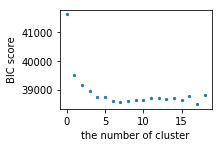

[41612.85267231 39493.64899829 39174.46664593 38944.42270466
 38740.10461107 38738.00135754 38607.95012357 38570.9963011
 38591.2583391  38641.61857309 38627.85216124 38708.24135544
 38706.33581456 38656.4400526  38700.56564473 38652.61464471
 38788.41311074 38487.57763087 38812.76123676]


18

In [54]:
lowest_bic = np.infty
# it seems to converge to local??? 
n_components_range = range(1, 20)
#cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full']
i = 0
for cv_type in cv_types:
    bic = []
    i += 1
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            best_n = n_components
    bic = np.array(bic)
    plt.subplot(2,2,i)
    plt.xlabel('the number of cluster')
    plt.ylabel('BIC score')
    plt.scatter(range(len(bic)),bic,s=5)
    plt.show()
        
# color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
#                               'darkorange'])
gmm = best_gmm
print(bic)
best_n

In [55]:
gmm = mixture.GaussianMixture(n_components=7, covariance_type='full')

In [56]:
gmm.fit(x)
#gmm.fit(z)
# testing should be different from training!!!
cluster = gmm.predict(x)
#cluster = gmm.predict(z)
np.unique(cluster)

array([0, 1, 2, 3, 4, 5, 6])

In [57]:
import pickle
filename = 'gmm_model.sav'
# python3
pickle.dump(gmm,open(filename,'wb'))

In [58]:
load_model = pickle.load(open(filename,'rb'))
test = [35,25]
# pred = load_model.predict(np.array(test).reshape(1,-1))
# pred

Text(0, 0.5, 'Air Temperature')

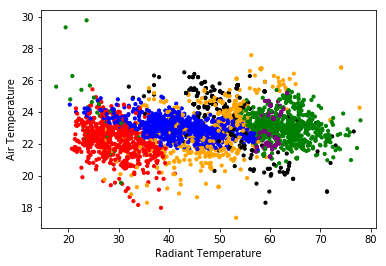

In [59]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'orange',
                   2 : 'g',
                   3 : 'purple',
                   4 : 'b',
                   5 : 'black',
                   6 : 'green'
                   }
#labels = ['0','1','2','3']
label_color = [LABEL_COLOR_MAP[l] for l in cluster]
plt.scatter(x['RH'],x['TAAV'],c=label_color,s=10,cmap='viridis')
plt.xlabel("Radiant Temperature")
plt.ylabel("Air Temperature")

In [60]:
'''
# normalize x
scaler = StandardScaler()
normx = scaler.fit_transform(x)
gmm = mixture.GaussianMixture(n_components=4, covariance_type='diag')
gmm.fit(normx)
# testing should be different from training!!!
cluster = gmm.predict(normx)
np.unique(cluster)
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'orange',
                   2 : 'g',
                   3 : 'purple'
                   }
labels = ['0','1','2','3']
label_color = [LABEL_COLOR_MAP[l] for l in cluster]
plt.scatter(x['TAAV'],x['RH'],c=label_color,s=10,cmap='viridis')
plt.xlabel("Temperature")
plt.ylabel("Relative humidity")
'''

'\n# normalize x\nscaler = StandardScaler()\nnormx = scaler.fit_transform(x)\ngmm = mixture.GaussianMixture(n_components=4, covariance_type=\'diag\')\ngmm.fit(normx)\n# testing should be different from training!!!\ncluster = gmm.predict(normx)\nnp.unique(cluster)\nLABEL_COLOR_MAP = {0 : \'r\',\n                   1 : \'orange\',\n                   2 : \'g\',\n                   3 : \'purple\'\n                   }\nlabels = [\'0\',\'1\',\'2\',\'3\']\nlabel_color = [LABEL_COLOR_MAP[l] for l in cluster]\nplt.scatter(x[\'TAAV\'],x[\'RH\'],c=label_color,s=10,cmap=\'viridis\')\nplt.xlabel("Temperature")\nplt.ylabel("Relative humidity")\n'

In [61]:
# get the features of each cluster
index0, = np.where(cluster == 0)
index1, = np.where(cluster == 1)
index2, = np.where(cluster == 2)
index3, = np.where(cluster == 3)
index4, = np.where(cluster == 4)
index5, = np.where(cluster == 5)
index6, = np.where(cluster == 6)
x0 = x.iloc[index0.tolist()]
x1 = x.iloc[index1.tolist()]
x2 = x.iloc[index2.tolist()]
x3 = x.iloc[index3.tolist()]
x4 = x.iloc[index4.tolist()]
x5 = x.iloc[index5.tolist()]
x6 = x.iloc[index6.tolist()]
# get the sensation of each cluster
y0 = y.iloc[index0.tolist()]
y1 = y.iloc[index1.tolist()]
y2 = y.iloc[index2.tolist()]
y3 = y.iloc[index3.tolist()]
y4 = y.iloc[index4.tolist()]
y5 = y.iloc[index5.tolist()]
y6 = y.iloc[index6.tolist()]

In [62]:
print('INSUL','TAAV','RH')
gmm.means_

INSUL TAAV RH


array([[22.2249247 , 29.75344985, 22.45795849],
       [22.81341059, 47.46360119, 23.16064317],
       [23.0883435 , 63.04570677, 23.34371745],
       [23.10630699, 59.82534873, 23.73146047],
       [22.98873694, 41.57834555, 23.15617515],
       [23.46380514, 52.93754229, 23.996105  ],
       [23.57547497, 26.52210295, 23.05493899]])

In [63]:
gmm.covariances_

array([[[ 1.20137095, -1.49293128,  1.28288116],
        [-1.49293128, 21.77792325, -1.53553435],
        [ 1.28288116, -1.53553435,  1.40350198]],

       [[ 2.05706578,  4.39906344,  1.96111743],
        [ 4.39906344, 80.54873664,  2.85262113],
        [ 1.96111743,  2.85262113,  1.99320661]],

       [[ 0.82984513, -1.11469516,  0.72341736],
        [-1.11469516, 24.7343544 , -0.45857093],
        [ 0.72341736, -0.45857093,  0.68276374]],

       [[ 0.95475012,  0.53958571,  0.84816667],
        [ 0.53958571,  2.53244492,  0.59246012],
        [ 0.84816667,  0.59246012,  0.91647825]],

       [[ 0.39156801, -1.73870402,  0.361627  ],
        [-1.73870402, 58.49127647, -1.69043343],
        [ 0.361627  , -1.69043343,  0.34937981]],

       [[ 2.06429818, -4.20919093,  1.78822316],
        [-4.20919093, 43.13712557, -4.38586068],
        [ 1.78822316, -4.38586068,  2.40573992]],

       [[ 3.89953897, -4.52735762,  2.25025195],
        [-4.52735762, 13.39915351, -0.88569031],
        

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [65]:
import seaborn as sns

(1, 296)
(1, 162)
(1, 134)


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


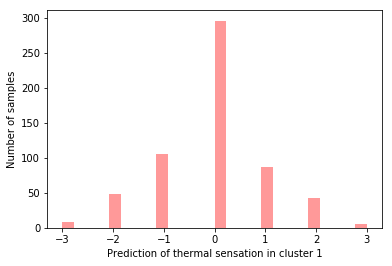

In [66]:
sns.distplot(y0,color='r',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 1')
print(np.shape(np.where(y0==0)))
print(np.shape(np.where(y0<0)))
print(np.shape(np.where(y0>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 259)
(1, 145)
(1, 176)


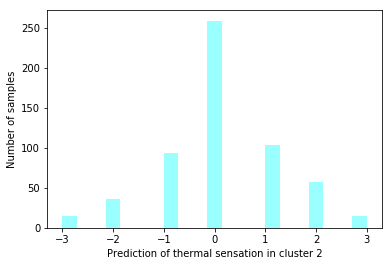

In [67]:
sns.distplot(y1,color='cyan',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 2')
print(np.shape(np.where(y1==0)))
print(np.shape(np.where(y1<0)))
print(np.shape(np.where(y1>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 286)
(1, 124)
(1, 207)


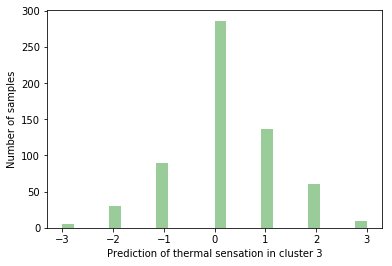

In [68]:
sns.distplot(y2,color='g',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 3')
print(np.shape(np.where(y2==0)))
print(np.shape(np.where(y2<0)))
print(np.shape(np.where(y2>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 88)
(1, 58)
(1, 34)


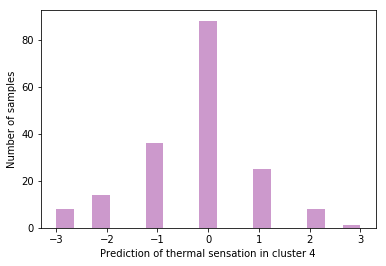

In [69]:
sns.distplot(y3,color='purple',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 4')
print(np.shape(np.where(y3==0)))
print(np.shape(np.where(y3<0)))
print(np.shape(np.where(y3>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 447)
(1, 142)
(1, 279)


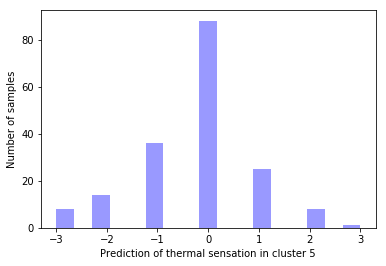

In [70]:
sns.distplot(y3,color='blue',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 5')
print(np.shape(np.where(y4==0)))
print(np.shape(np.where(y4<0)))
print(np.shape(np.where(y4>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 171)
(1, 102)
(1, 132)


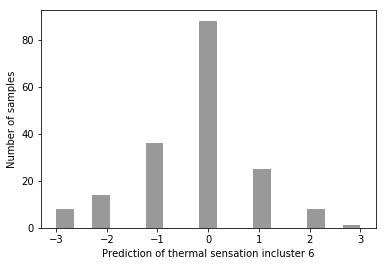

In [71]:
sns.distplot(y3,color='black',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation incluster 6')
print(np.shape(np.where(y5==0)))
print(np.shape(np.where(y5<0)))
print(np.shape(np.where(y5>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(1, 13)
(1, 10)
(1, 10)


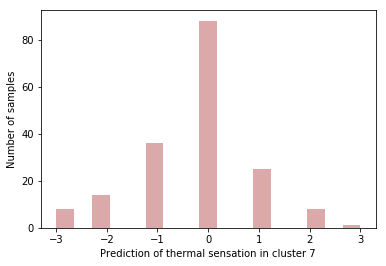

In [72]:
sns.distplot(y3,color='brown',kde=False)
plt.ylabel('Number of samples')
plt.xlabel('Prediction of thermal sensation in cluster 7')
print(np.shape(np.where(y6==0)))
print(np.shape(np.where(y6<0)))
print(np.shape(np.where(y6>0)))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


1560
1715


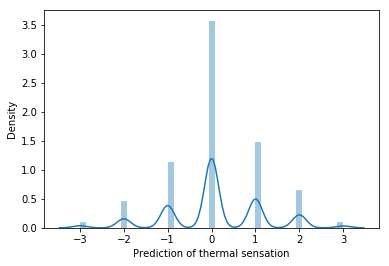

In [73]:
sns.distplot(y)
plt.ylabel('Density')
plt.xlabel('Prediction of thermal sensation')
print(np.shape(np.where(y==0))[1])
print(np.shape(np.where(y!=0))[1])

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'TAAV')

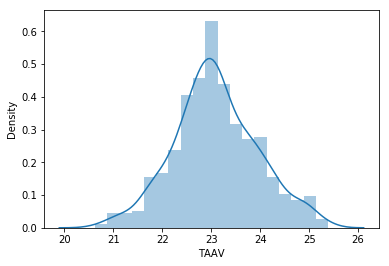

In [74]:
sns.distplot(x2['TAAV'])
plt.ylabel('Density')
plt.xlabel('TAAV')

In [75]:
x_new = x[['TAAV','RH','INSUL']]

KeyError: "['INSUL'] not in index"

In [ ]:
lili_new = pd.read_csv('lili_feature.csv', sep=',',engine='python')

In [ ]:
lili = lili_new[['temperature','humidity','clo','sensation']]
lili_y = lili['sensation']
lili_x = lili[['temperature','humidity','clo']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
x= x[['TAAV','RH','INSUL']]
x0 = x0[['TAAV','RH','INSUL']]
x1 = x1[['TAAV','RH','INSUL']]
x2 = x2[['TAAV','RH','INSUL']]
x3 = x3[['TAAV','RH','INSUL']]
best = 0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(knn, x, y, cv=5).mean()
    if score > best:
        best = score
    best_k = i+1 
    
best_k
# best k could be 30 but it seems the larger the k is, the better

In [ ]:
knn.fit(x, y) 
# evaluation with rp884 training data
#predicted = cross_val_predict(knn, x, y, cv=5)
predicted = knn.predict(x)
test_score = metrics.accuracy_score(y, predicted) 
# test with experimental data
predicted = knn.predict(lili_x)
test = metrics.accuracy_score(lili_y, predicted)

In [ ]:
predicted

In [ ]:
diff = test_score - test
diff

In [ ]:
clf = svm.SVC(kernel='rbf',gamma=0.1,C=1)
clf = RandomForestClassifier(n_estimators=50, max_depth = 3, random_state=0)

In [ ]:
clf.fit(x,y)

In [ ]:
predicted = clf.predict(x)
test_score = metrics.accuracy_score(y, predicted) 
predicted = clf.predict(lili_x)
test = metrics.accuracy_score(lili_y, predicted)

In [ ]:
diff = test_score - test
diff

In [ ]:
test

In [ ]:
predicted

In [ ]:
np.logspace(-1, 0, 5)